In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from datetime import datetime
from os import path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from cafeen import utils
mpl.style.use('ggplot')

In [2]:
path_to_train = path.join(path.abspath('..'), 'data', 'train.csv')
path_to_test = path.join(path.abspath('..'), 'data', 'test.csv')

In [3]:
train = pd.read_csv(path_to_train)
test = pd.read_csv(path_to_test)

In [4]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
for feature in train.columns:
    p_na = train.loc[train[feature].isna(), 'target'].mean()
    p = train.loc[~train[feature].isna(), 'target'].mean()
    print(f'{feature}: n_na {train[feature].isna().sum()}, p_na {p_na:.4f}, p {p:.4f}, {p_na-p:.4f}')

id: n_na 0, p_na nan, p 0.1872, nan
bin_0: n_na 17894, p_na 0.1884, p 0.1872, 0.0012
bin_1: n_na 18003, p_na 0.1884, p 0.1872, 0.0012
bin_2: n_na 17930, p_na 0.1862, p 0.1872, -0.0010
bin_3: n_na 18014, p_na 0.1881, p 0.1872, 0.0009
bin_4: n_na 18047, p_na 0.1868, p 0.1872, -0.0004
nom_0: n_na 18252, p_na 0.1853, p 0.1873, -0.0020
nom_1: n_na 18156, p_na 0.1828, p 0.1873, -0.0045
nom_2: n_na 18035, p_na 0.1866, p 0.1872, -0.0006
nom_3: n_na 18121, p_na 0.1859, p 0.1872, -0.0014
nom_4: n_na 18035, p_na 0.1855, p 0.1873, -0.0017
nom_5: n_na 17778, p_na 0.1817, p 0.1874, -0.0056
nom_6: n_na 18131, p_na 0.1854, p 0.1873, -0.0018
nom_7: n_na 18003, p_na 0.1857, p 0.1873, -0.0015
nom_8: n_na 17755, p_na 0.1918, p 0.1871, 0.0047
nom_9: n_na 18073, p_na 0.1878, p 0.1872, 0.0007
ord_0: n_na 18288, p_na 0.1871, p 0.1872, -0.0001
ord_1: n_na 18041, p_na 0.1874, p 0.1872, 0.0002
ord_2: n_na 18075, p_na 0.1866, p 0.1872, -0.0006
ord_3: n_na 17916, p_na 0.1882, p 0.1872, 0.0010
ord_4: n_na 17930, p_

In [6]:
for col in train.columns:
    if col not in ['id', 'target']:
        msg = \
            f'{col:5s}: ' + \
            f'{train[col].nunique():4.0f}, ' + \
            f'{train[col].isna().sum():5.0f}, ' + \
            f'{test[col].isna().sum():5.0f}, ' + \
            f'{train[col].isna().sum()/test[col].isna().sum():5.3f}'        
        print(msg)

bin_0:    2, 17894, 11901, 1.504
bin_1:    2, 18003, 12038, 1.496
bin_2:    2, 17930, 11972, 1.498
bin_3:    2, 18014, 11951, 1.507
bin_4:    2, 18047, 11951, 1.510
nom_0:    3, 18252, 12062, 1.513
nom_1:    6, 18156, 11947, 1.520
nom_2:    6, 18035, 12179, 1.481
nom_3:    6, 18121, 12176, 1.488
nom_4:    4, 18035, 11993, 1.504
nom_5: 1220, 17778, 11912, 1.492
nom_6: 1519, 18131, 12012, 1.509
nom_7:  222, 18003, 12003, 1.500
nom_8:  222, 17755, 11956, 1.485
nom_9: 2218, 18073, 12060, 1.499
ord_0:    3, 18288, 11893, 1.538
ord_1:    5, 18041, 12167, 1.483
ord_2:    6, 18075, 12105, 1.493
ord_3:   15, 17916, 12053, 1.486
ord_4:   26, 17930, 11933, 1.503
ord_5:  190, 17713, 12047, 1.470
day  :    7, 17952, 12025, 1.493
month:   12, 17988, 11984, 1.501


0: 49.6478, 29.8042
1: 35.2391, 21.1383
2: 12.0332, 7.2111
3: 2.6102, 1.5664
4: 0.4164, 0.2487
5: 0.0503, 0.0294
6: 0.0029, 0.0018
7: 0.0001, 0.0001


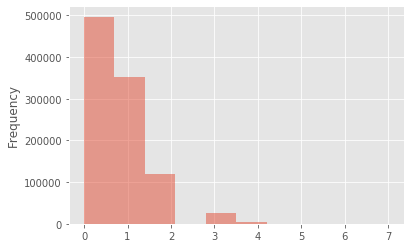

In [7]:
test['target'] = -1
df = pd.concat([train, test])
df['n_nan'] = train.isnull().sum(axis=1)
df['n_nan'].plot.hist(alpha=0.5);
n_nan_all = 100 * df.groupby('n_nan')['target'].count() / len(df)
n_nan_train = 100 * df[df['target']>-1].groupby('n_nan')['target'].count() / len(df)
for i in range(len(n_nan_all)):
    print(f'{n_nan_all.index[i]}: {n_nan_all[i]}, {n_nan_train[i]}')

In [8]:
test['target'] = -1
df = pd.concat([train, test])

for col in df.columns:
    if col not in ['id', 'target']:
        counts = df.groupby(col)['target'].count()        
        
        sum_counts = ''
        
        for n in range(5, 200, 20):
            nobs = 100 * counts[counts < n].sum() / len(train)
            
            if nobs > 0:
                sum_counts += f'{n:3.0f}: {nobs:4.1f}, '
        
        print(f'{col:5s}: {sum_counts}')

bin_0: 
bin_1: 
bin_2: 
bin_3: 
bin_4: 
nom_0: 
nom_1: 
nom_2: 
nom_3: 
nom_4: 
nom_5:   5:  0.0,  25:  0.1,  45:  0.1,  65:  0.3,  85:  0.4, 105:  0.5, 125:  0.8, 145:  1.3, 165:  1.9, 185:  2.2, 
nom_6:   5:  0.0,  25:  0.1,  45:  0.2,  65:  0.4,  85:  0.6, 105:  1.0, 125:  1.6, 145:  2.2, 165:  2.9, 185:  3.4, 
nom_7: 125:  0.0, 145:  0.0, 165:  0.0, 185:  0.0, 
nom_8: 105:  0.0, 125:  0.0, 145:  0.0, 165:  0.0, 185:  0.0, 
nom_9:   5:  0.0,  25:  0.1,  45:  0.4,  65:  0.8,  85:  1.5, 105:  2.5, 125:  3.6, 145:  4.7, 165:  6.1, 185:  7.5, 
ord_0: 
ord_1: 
ord_2: 
ord_3: 
ord_4: 
ord_5: 165:  0.1, 185:  0.1, 
day  : 
month: 


In [9]:
from cafeen import utils
df = utils.mark_as_na(df, ['nom_5', 'nom_6', 'nom_9'], threshold=50)

for col in df.columns:
    if col not in ['id', 'target']:
        counts = df.groupby(col)['target'].count()        
        
        sum_counts = ''
        
        for n in range(5, 200, 20):
            nobs = 100 * counts[counts < n].sum() / len(train)
            
            if nobs > 0:
                sum_counts += f'{n:3.0f}: {nobs:4.1f}, '
        
        print(f'{col:5s}: {sum_counts}')

bin_0: 
bin_1: 
bin_2: 
bin_3: 
bin_4: 
nom_0: 
nom_1: 
nom_2: 
nom_3: 
nom_4: 
nom_5:  65:  0.1,  85:  0.2, 105:  0.4, 125:  0.6, 145:  1.2, 165:  1.7, 185:  2.1, 
nom_6:  65:  0.1,  85:  0.3, 105:  0.8, 125:  1.3, 145:  1.9, 165:  2.7, 185:  3.2, 
nom_7: 125:  0.0, 145:  0.0, 165:  0.0, 185:  0.0, 
nom_8: 105:  0.0, 125:  0.0, 145:  0.0, 165:  0.0, 185:  0.0, 
nom_9:  65:  0.3,  85:  1.0, 105:  2.0, 125:  3.1, 145:  4.2, 165:  5.6, 185:  6.9, 
ord_0: 
ord_1: 
ord_2: 
ord_3: 
ord_4: 
ord_5: 165:  0.1, 185:  0.1, 
day  : 
month: 


/home/alex/miniconda3/envs/cafeen/lib/python3.7/site-packages/pandas-0.25.3-py3.7-linux-x86_64.egg/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


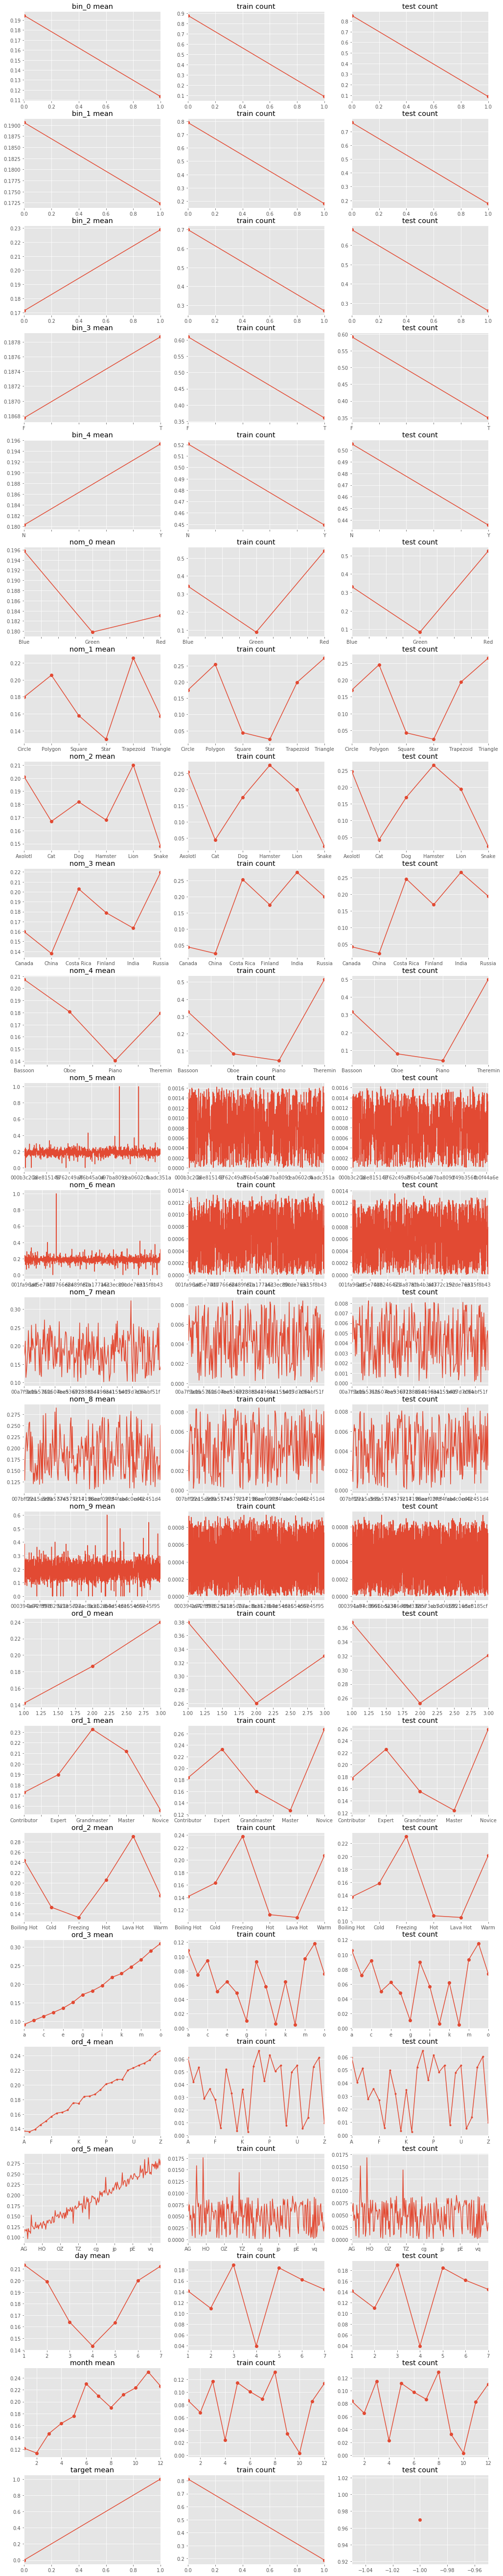

In [10]:
features = [col for col in test.columns if col not in ['id']]
nrows = len(features)
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize=(17,4*nrows))

for i in range(nrows):
    if train[features[i]].nunique() <= 15:
        marker = 'o'
    elif train[features[i]].nunique() <= 50:
        marker = '.'
    else:
        marker = None
        
    train_counts = train.groupby(features[i])['target'].count() / len(train)
    test_counts = test.groupby(features[i])['day'].count() / len(test)
    
    train.groupby(features[i])['target'].mean().plot(ax=ax[i, 0], marker=marker)
    train_counts.plot(ax=ax[i, 1], marker=marker)
    test_counts.plot(ax=ax[i, 2], marker=marker)
    ax[i, 0].set_title(features[i] + ' mean')
    ax[i, 1].set_title('train count')
    ax[i, 2].set_title('test count')
    
    for j in range(ncols):
        ax[i, j].set_xlabel('')

In [26]:
df = utils.read_data()
features = utils.get_features(df.columns)

In [27]:
df = utils.target_encoding(df, ['ord_3'], smoothing=0)

/home/alex/miniconda3/envs/cafeen/lib/python3.7/site-packages/pandas-0.25.3-py3.7-linux-x86_64.egg/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


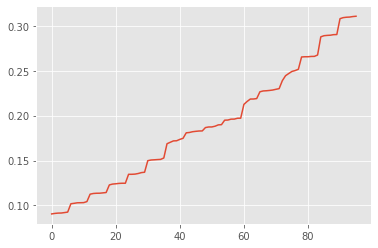

In [28]:
plt.plot(np.sort(df['ord_3'].unique()))

In [12]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.194506,0.190600,0.171085,0.186590,0.180530,0.182960,0.224364,0.167419,0.219119,...,0.158824,0.240001,0.173955,0.205929,0.114332,0.223733,0.145339,0.200839,0.146486,0
1,1,0.114268,0.172566,0.171085,0.186590,0.194957,0.182960,0.130122,0.201132,0.185075,...,0.143204,0.240001,0.231454,0.175294,0.134617,0.234159,0.237785,0.212760,0.208616,0
2,2,0.194506,0.172566,0.171085,0.186590,0.180530,0.182960,0.184758,0.167419,0.158044,...,0.189469,0.240001,0.188130,0.131478,0.290206,0.200635,0.214833,0.163350,0.211561,0
3,3,0.187582,0.190714,0.171426,0.186848,0.179599,0.183316,0.179869,0.168158,0.179773,...,0.262295,0.141873,0.156559,0.289054,0.092533,0.138102,0.186473,0.162795,0.146925,0
4,4,0.194639,0.189362,0.171054,0.188072,0.180544,0.183098,0.157681,0.167755,0.202740,...,0.251641,0.240165,0.232867,0.152148,0.181226,0.140080,0.165629,0.162757,0.224777,0


In [34]:
df.groupby('ord_3')['target'].agg(['mean', 'count']).sort_values(by='mean').tail(50)

,mean,count
ord_3,,
0.174720,0.160784,1275
0.173529,0.164863,1201
0.171998,0.171216,1209
0.170294,0.178161,1218
0.182950,0.178588,11087
0.182871,0.178877,11002
0.182514,0.180363,11183
0.189927,0.181442,3621
0.189679,0.182206,3518
